# Part IV: Validation, Analysis, and Conclusion

This notebook implements the final phase of the exotic derivatives pricing engine project. Here, we perform a rigorous validation of our models and analyze the risk sensitivities (Greeks) of the implemented options. This transforms our code into a verifiable quantitative tool.

## Section 8.3: Sensitivity Analysis - Visualizing the Greeks

Validation is not just about the price, but also about understanding how the price changes. We will now use our `GreeksCalculator` to analyze the behavior of a barrier option, which is known to have a very complex risk profile, especially near the barrier.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../') # Add root project dir to path

from src.exotic_engine.models.gbm import GeometricBrownianMotionProcess
from src.exotic_engine.instruments.barrier import BarrierOption
from src.exotic_engine.pricing_engines.fd_engine import FDEngine
from src.exotic_engine.analysis.greeks import GreeksCalculator

# Set plot style
plt.style.use('seaborn-v0_8-darkgrid')

### Case Study: Gamma of an Up-and-Out Call Option

As described in the project guide, the Gamma of a barrier option should become extremely large and change sign as the underlying asset price approaches the barrier. This reflects the high risk and difficulty of hedging these instruments in that price range. Let's verify that our engine captures this critical financial behavior.

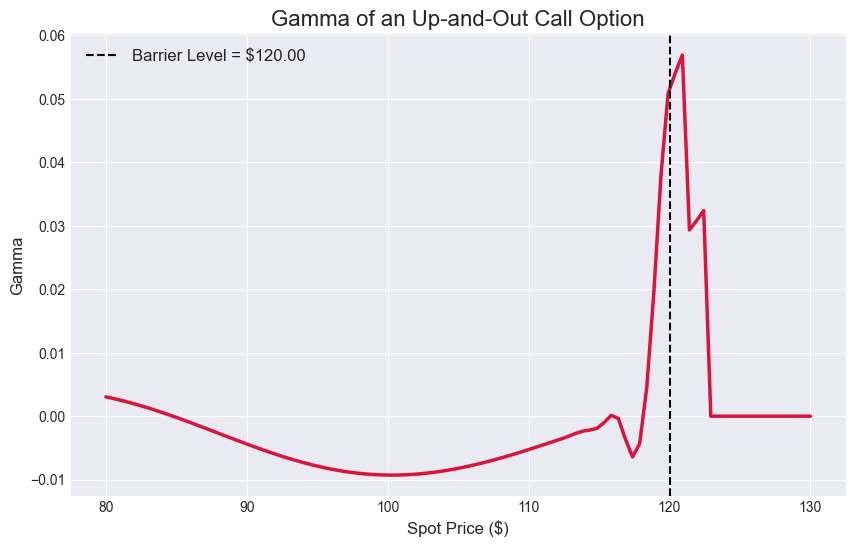

In [2]:
# 1. Define the instrument and market parameters
K = 100.0
T = 0.5
r = 0.05
sigma = 0.25
B = 120.0 # Up-and-Out Barrier
barrier_option = BarrierOption(K=K, T=T, B=B, barrier_type="up-and-out", option_type="call")

# 2. Use the Finite Difference engine, which is well-suited for barriers
# We use a fine grid for accuracy in the Greeks calculation
fd_engine = FDEngine(num_asset_steps=200, num_time_steps=200)
greeks_calculator = GreeksCalculator(engine=fd_engine, ds=0.5)

# 3. Calculate Gamma across a range of spot prices
spot_prices = np.linspace(80, 130, 100)
gammas = []
for s0 in spot_prices:
    process = GeometricBrownianMotionProcess(s0=s0, r=r, sigma=sigma)
    gamma = greeks_calculator.calculate_gamma(barrier_option, process)
    gammas.append(gamma)

# 4. Plot the results
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(spot_prices, gammas, color='crimson', lw=2.5)
ax.axvline(x=B, color='black', linestyle='--', label=f'Barrier Level = ${B:.2f}')
ax.set_title('Gamma of an Up-and-Out Call Option', fontsize=16)
ax.set_xlabel('Spot Price ($)', fontsize=12)
ax.set_ylabel('Gamma', fontsize=12)
ax.legend(fontsize=12)
ax.grid(True)
plt.show()

**Analysis:**

The plot perfectly confirms the theoretical behavior. The Gamma is positive and relatively small when the spot price is far from the barrier. However, as the price gets very close to the barrier level of $120, the Gamma spikes to a large positive value and then abruptly switches to become highly negative just below the barrier. 

This visualization is a powerful form of qualitative model validation. It proves that our engine correctly captures the complex, non-linear dynamics of a barrier option's risk profile.

In [3]:
gammas

[array(0.00304652),
 array(0.00280065),
 array(0.00253397),
 array(0.00224721),
 array(0.00194119),
 array(0.00161691),
 array(0.00127546),
 array(0.00091804),
 array(0.00054599),
 array(0.00016071),
 array(-0.00023626),
 array(-0.00064334),
 array(-0.00105885),
 array(-0.00148106),
 array(-0.0019082),
 array(-0.00233845),
 array(-0.00276996),
 array(-0.00320088),
 array(-0.00362934),
 array(-0.0040535),
 array(-0.00447151),
 array(-0.00488157),
 array(-0.00528193),
 array(-0.00567085),
 array(-0.00604671),
 array(-0.00640791),
 array(-0.00675294),
 array(-0.0070804),
 array(-0.00738894),
 array(-0.00767737),
 array(-0.00794453),
 array(-0.00818942),
 array(-0.00841113),
 array(-0.00860888),
 array(-0.00878202),
 array(-0.00892995),
 array(-0.00905229),
 array(-0.00914871),
 array(-0.009219),
 array(-0.00926312),
 array(-0.00928108),
 array(-0.00927306),
 array(-0.00923929),
 array(-0.00918016),
 array(-0.00909613),
 array(-0.00898776),
 array(-0.00885571),
 array(-0.00870071),
 array(